# CHIPOTLE DATASE

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. To see the first 10 entries

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### 2. The number of observations in the dataset 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [4]:
df.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


### 3. The number of columns in the dataset 

In [5]:
print(df.shape)
print(df.shape[1])

(4622, 5)
5


### 4. To print the name of all the columns.

In [6]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### 5. The dataset indexed by

In [7]:
df.index

RangeIndex(start=0, stop=4622, step=1)

### 6. For the most-ordered item and the quantity

In [8]:
m=df.groupby(['item_name']).agg({'quantity':'sum'}).sort_values('quantity',ascending=False).head(1)
m

,quantity
item_name,
Chicken Bowl,761


### 7. The most ordered item in the choice_description column

In [9]:
u=df.groupby(['choice_description']).sum().sort_values('quantity',ascending=False).head(1)
u

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


### 8. The items were orderd in total

In [10]:
df.quantity.sum()

4972

### 9a. To check the item price type

In [11]:
print(df.item_price.dtype)

object


### 9b. To create a lambda function and change the type of item price

In [12]:
df.item_price=df.item_price.apply(lambda y: float(y[1:-1]))
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### 9c. To check the item price type

In [13]:
print(df.item_price.dtype)

float64


### 10. The revenue for the period in the dataset

In [14]:
rev = (df['quantity']*df['item_price']).sum()
round(rev)

39237.0

### 11. The orders were made in the period

In [15]:
o=df.order_id.nunique()
print(o)

1834


### 12. The average revenue amount per order

In [16]:
df['revenue'] = df['quantity'] * df['item_price']
order_grouped = df.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

### 13. The number ofdifferent items are sold

In [17]:
i=df.item_name.value_counts().count()
i

50

### 14. To create a histogram of the top 5 items bought

                     quantity
item_name                    
Chicken Bowl              761
Chicken Burrito           591
Chips and Guacamole       506
Steak Burrito             386
Canned Soft Drink         351


<BarContainer object of 5 artists>

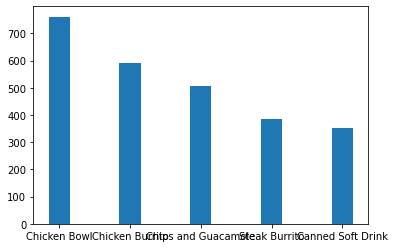

In [18]:
g=pd.DataFrame(df.groupby(['item_name']).agg({'quantity':'sum'}).sort_values('quantity',ascending=False)).head(5)
print(g)
plt.bar(g.index,g.quantity,width=0.3)

### 15. To create a scatterplot with the number of items orderered per order price

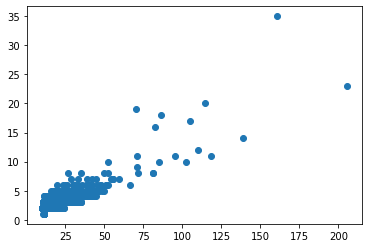

In [19]:
g1=df.groupby(['order_id']).agg({'quantity':'sum','item_price':'sum'}).sort_values('quantity',ascending=False)
plt.scatter(x = g1.item_price, y = g1.quantity)